In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import numpy as np
import random
import cProfile

import tree_utils as tu
from wilsons import * #wilsons, loop_exists, pick_leaf, randomly_pick_root

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


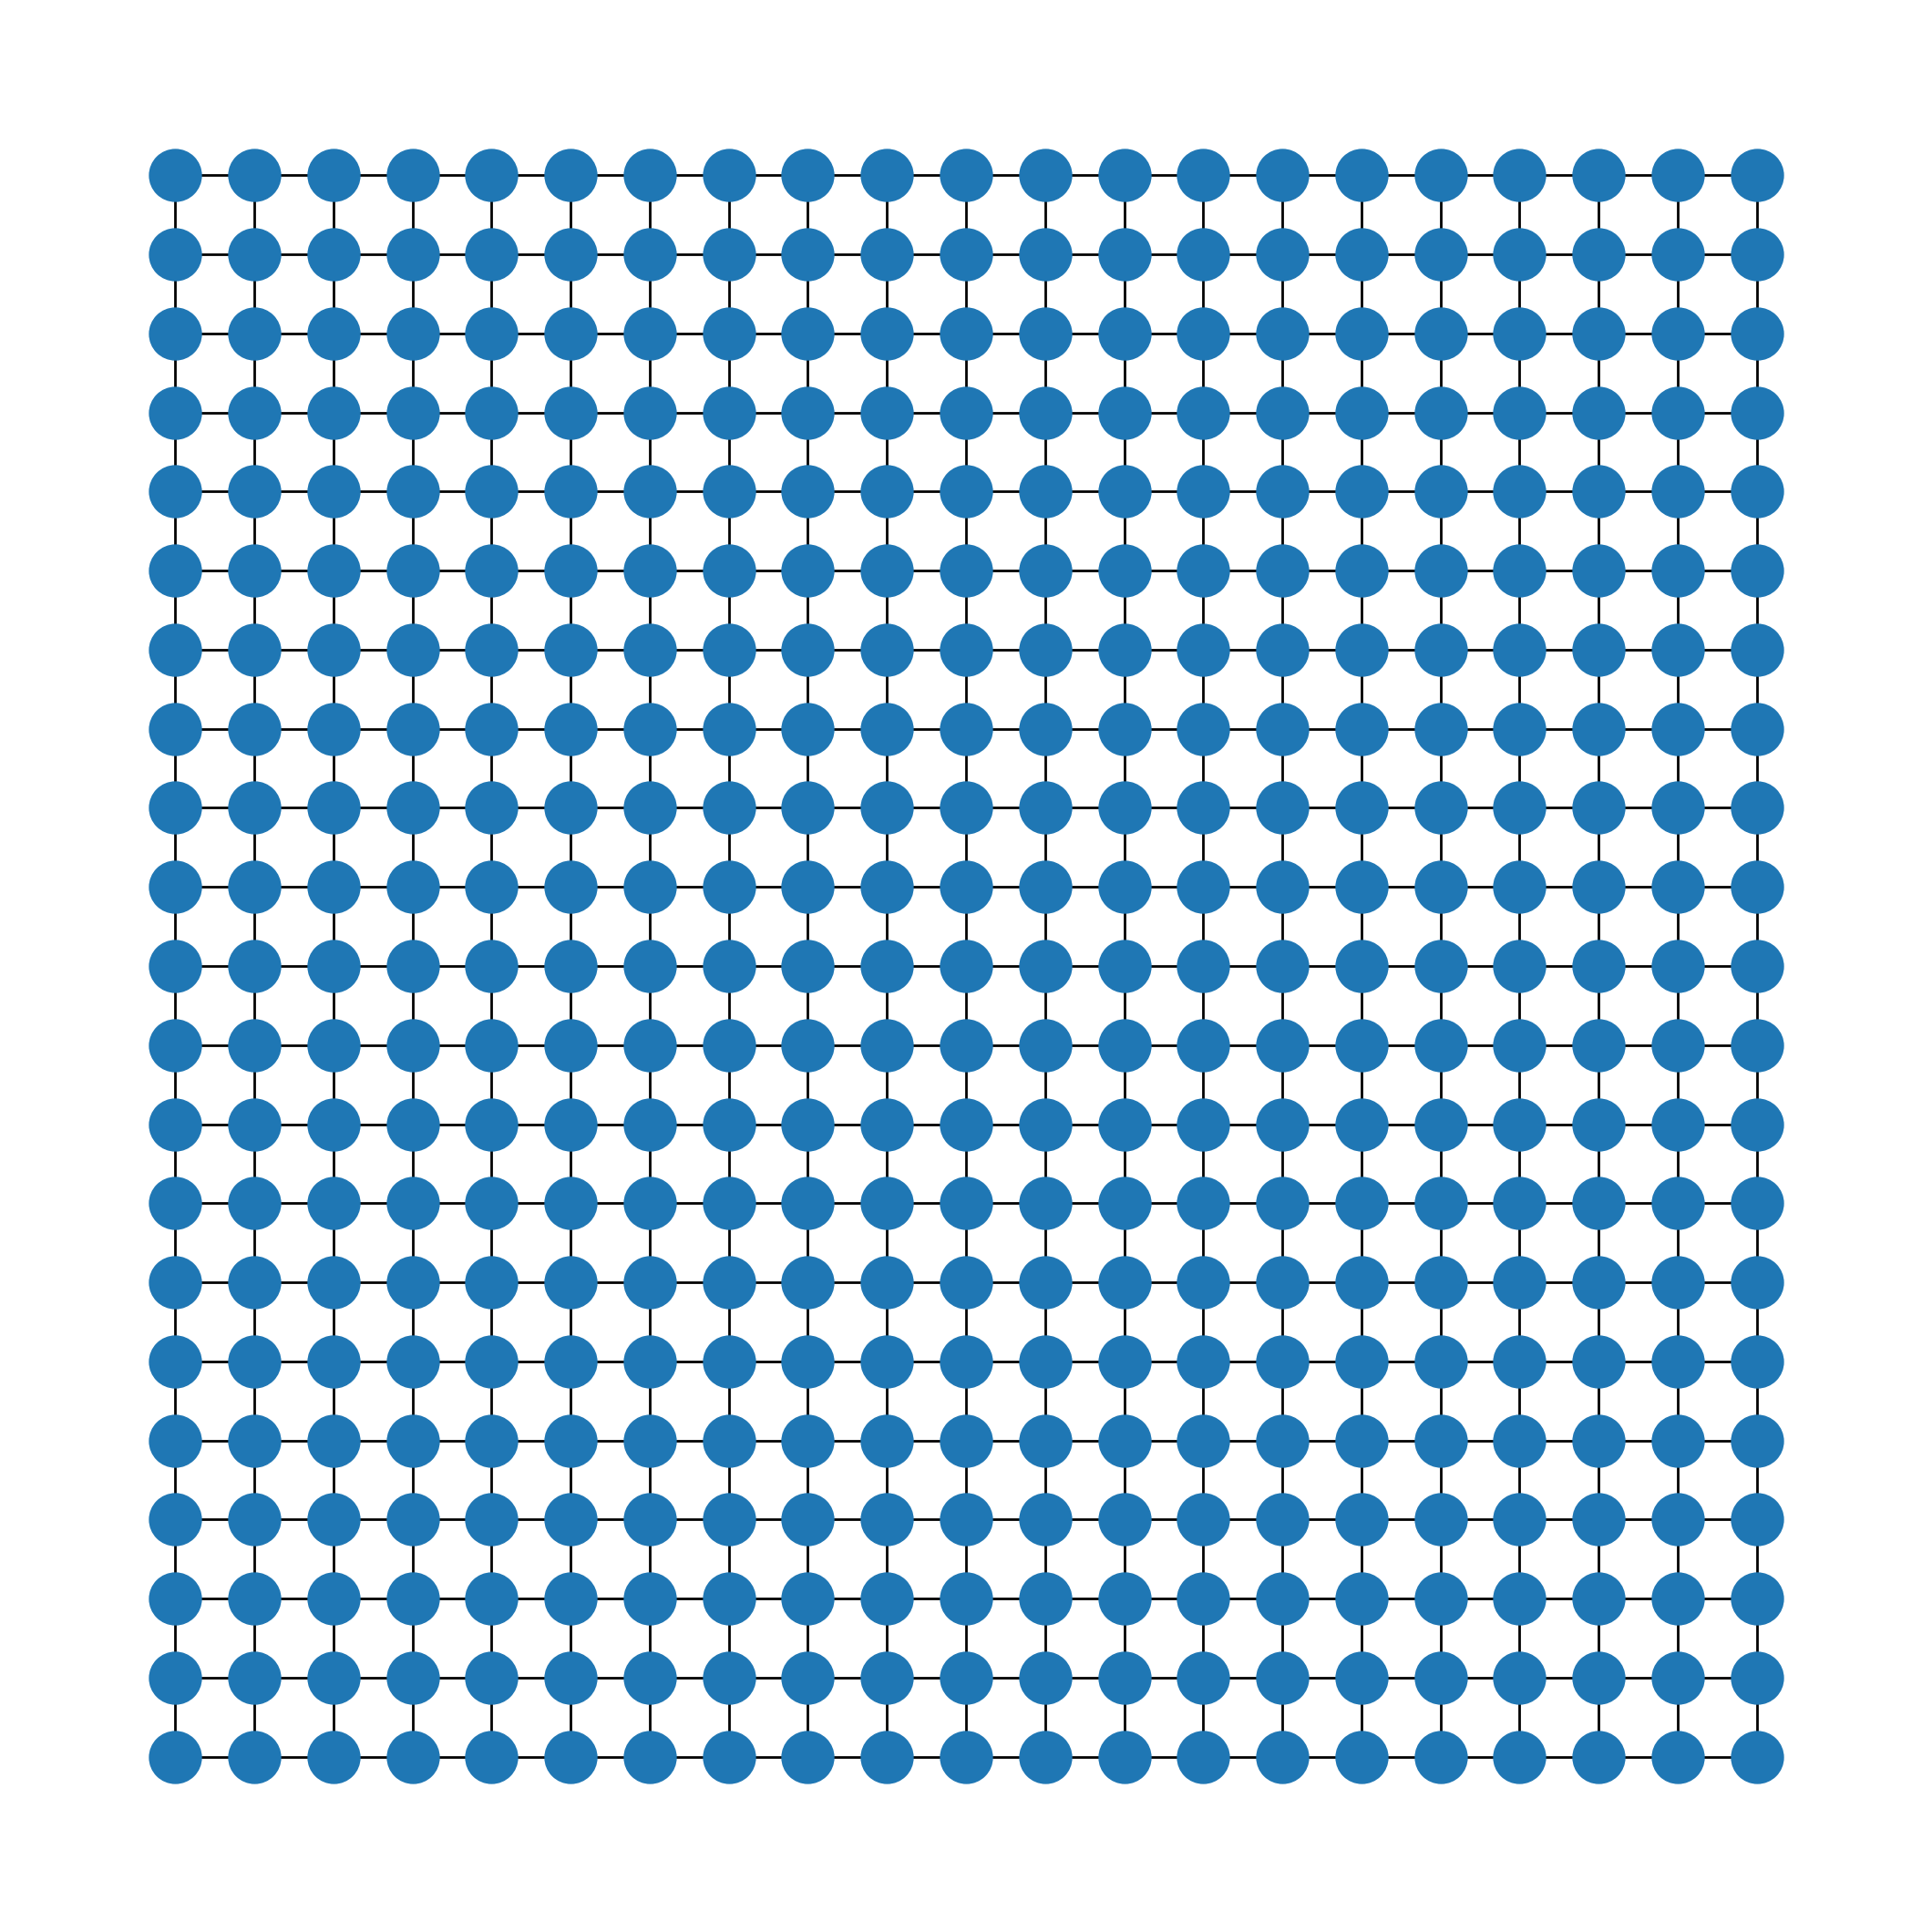

In [11]:
dims = (21, 21)
g = tu.generate_grid_graph(dims, queen=False)
# all_trees = [tu.tup(tree) for tree in tu.enumerate_all_trees(g)]
num_trials = 1000
tu.draw(g)

In [13]:
# for i in range(1000):
#     tree = wilsons(g)
#     tu.test_valid_tree(tree, g)
    
def sample_trees_wilsons(num_trials, save=True):
    data = []
    for _ in tqdm(range(num_trials)):
        tree = wilsons(g)
#         tree = wilsons(g, init_root=(0,0))
        if save:
            idx = all_trees.index(tu.tup(tree))
            data.append(idx)
    return data

data = sample_trees_wilsons(num_trials, False)
# tu.plot_sampled_STs(all_trees, data)

100%|███████████████████████████████████████████| 1000/1000 [04:12<00:00,  3.97it/s]


In [ ]:
# comparison with the spanning tree function already in tree_utils
data = tu.sample_STs(all_trees, "UST", num_trials)
tu.plot_sampled_STs(all_trees, data)

In [14]:
# for i in range(1000):
#     tree = rev_wilsons(g)
#     tu.test_valid_tree(tree, g)

    
def sample_trees_rev_wilsons(num_trials, save=True):    
    data = []
    for _ in tqdm(range(num_trials)):
#         tree = rev_wilsons(g)
        tree = rev_wilsons(g, init_root=(11, 11))
        if save:
            idx = all_trees.index(tu.tup(tree))
            data.append(idx)
    return data

data = sample_trees_rev_wilsons(num_trials, False)
# tu.plot_sampled_STs(all_trees, data)

100%|███████████████████████████████████████████| 1000/1000 [04:35<00:00,  3.63it/s]


In [ ]:
# cProfile.run('sample_trees_wilsons(num_trials)')
# cProfile.run('sample_trees_rev_wilsons(num_trials)')

In [ ]:
def cc_initialize_stacks(g):
    stacks = dict()
    for node in g.nodes():
        pop(node, stacks, g)
    return stacks

def graph_from_stacks(stacks):
    """ every node should be present in ``stacks" as a key.
    """
    graph = nx.Graph()
    for k, v in stacks.items():
        graph.add_edge(k, v)
    return graph

def random_root_from_largest_cc(stacks):
    graph = graph_from_stacks(stacks)
    largest_cc = max(nx.connected_components(graph), key=len)
    
    return random.choice(list(largest_cc))

def cc_wilsons(g):
    """
    """
    stacks = cc_initialize_stacks(g)
    root = random_root_from_largest_cc(stacks)
    tree = nx.Graph()
    tree.add_node(root)

    while tree.number_of_nodes() < g.number_of_nodes():
        src = pick_leaf(g, tree)
        lerw(src, g, tree, stacks)
        clear_tree_from_stacks(tree, stacks)

    return tree

def cc_rev_wilsons(g):
    stacks = cc_initialize_stacks(g)
    root = random_root_from_largest_cc(stacks)
    tree = nx.Graph()
    tree.add_node(root)

    while tree.number_of_nodes() < g.number_of_nodes():
        frontier = get_frontier(g, tree)
        if not add_frontier_to_tree(g, tree, frontier, stacks):
            src = random.choice(list(frontier))
            lerw(src, g, tree, stacks)

    return tree

def frontier_centrality_rev_wilsons(g, init_root=None):
    if init_root is None:
        root = randomly_pick_root(g)
    else:
        root = init_root

    tree = nx.Graph()
    tree.add_node(root)
    stacks = initialize_stacks(g, root)

    while tree.number_of_nodes() < g.number_of_nodes():
        frontier = get_frontier(g, tree)
        if not add_frontier_to_tree(g, tree, frontier, stacks):
            src = random.choice(list(frontier))
            lerw(src, g, tree, stacks)

    return tree

In [ ]:
for i in range(1000):
    tree = frontier_centrality_rev_wilsons(g)
    tu.test_valid_tree(tree, g)
    
def sample_trees_fc_rev_wilsons(num_trials, save=True):
    data = []
    for _ in tqdm(range(num_trials)):
        tree = frontier_centrality_rev_wilsons(g)
        if save:
            idx = all_trees.index(tu.tup(tree))
            data.append(idx)
    return data

data = sample_trees_cc_wilsons(num_trials, False)

In [ ]:
nx.betweenness_centrality()

In [ ]:
tu.draw(g)